In [52]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [53]:
# Load the data from the provided CSV file
data = pd.read_csv('./all_matches.csv')

# Display the first few rows of the data to understand its structure
data.head()

Unnamed: 0        table1                       col1        table2  \
0           0  Zhang2015-06  Warrant/Reasoning/Backing  Zhang2016-11   
1           1  Zhang2015-06            General Content  Zhang2016-11   
2           2  Zhang2015-06               Organization  Zhang2016-11   
3           3  Zhang2015-06                Claim/Ideas  Zhang2016-11   
4           4  Zhang2015-06                   Evidence  Zhang2016-11   

                        col2  sim_score  
0  Warrant/Reasoning/Backing   0.925031  
1            General Content   0.917857  
2               Organization   0.915981  
3                Claim/Ideas   0.914969  
4                   Evidence   0.911585

In [54]:
left_dict = defaultdict(list)
right_dict = defaultdict(list)

connections = defaultdict(list)
left_tables = []
right_tables = []
left_nodes = []
right_nodes = []
for index, row in data.iterrows():
    table1 = row['table1']
    col1 = row['col1']

    table2 = row['table2']
    col2 = row['col2']

    sim_score = row['sim_score']

    left_dict[table1].append(col1)
    right_dict[table2].append(col2)

    node1 = table1 + ' - ' + col1
    node2 = table2 + ' - ' + col2

    if table1 not in left_tables:
        left_tables.append(table1)
    if table2 not in right_tables:
        right_tables.append(table2)

    connections[node1].append((node2, sim_score))

    if node1 not in left_nodes:
        left_nodes.append(node1)
    if node2 not in right_nodes:
        right_nodes.append(node2)

left_tables.sort()
right_tables.sort()

left_nodes.sort()
right_nodes.sort()

In [55]:
# Define colors for each group based on the 'table1' and 'table2' columns
group_colors = {}
unique_tables = list(set(left_tables).union(set(right_tables)))
colors = plt.cm.get_cmap('tab20', len(unique_tables))

<ipython-input-55-7b4931b9478e>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_tables))


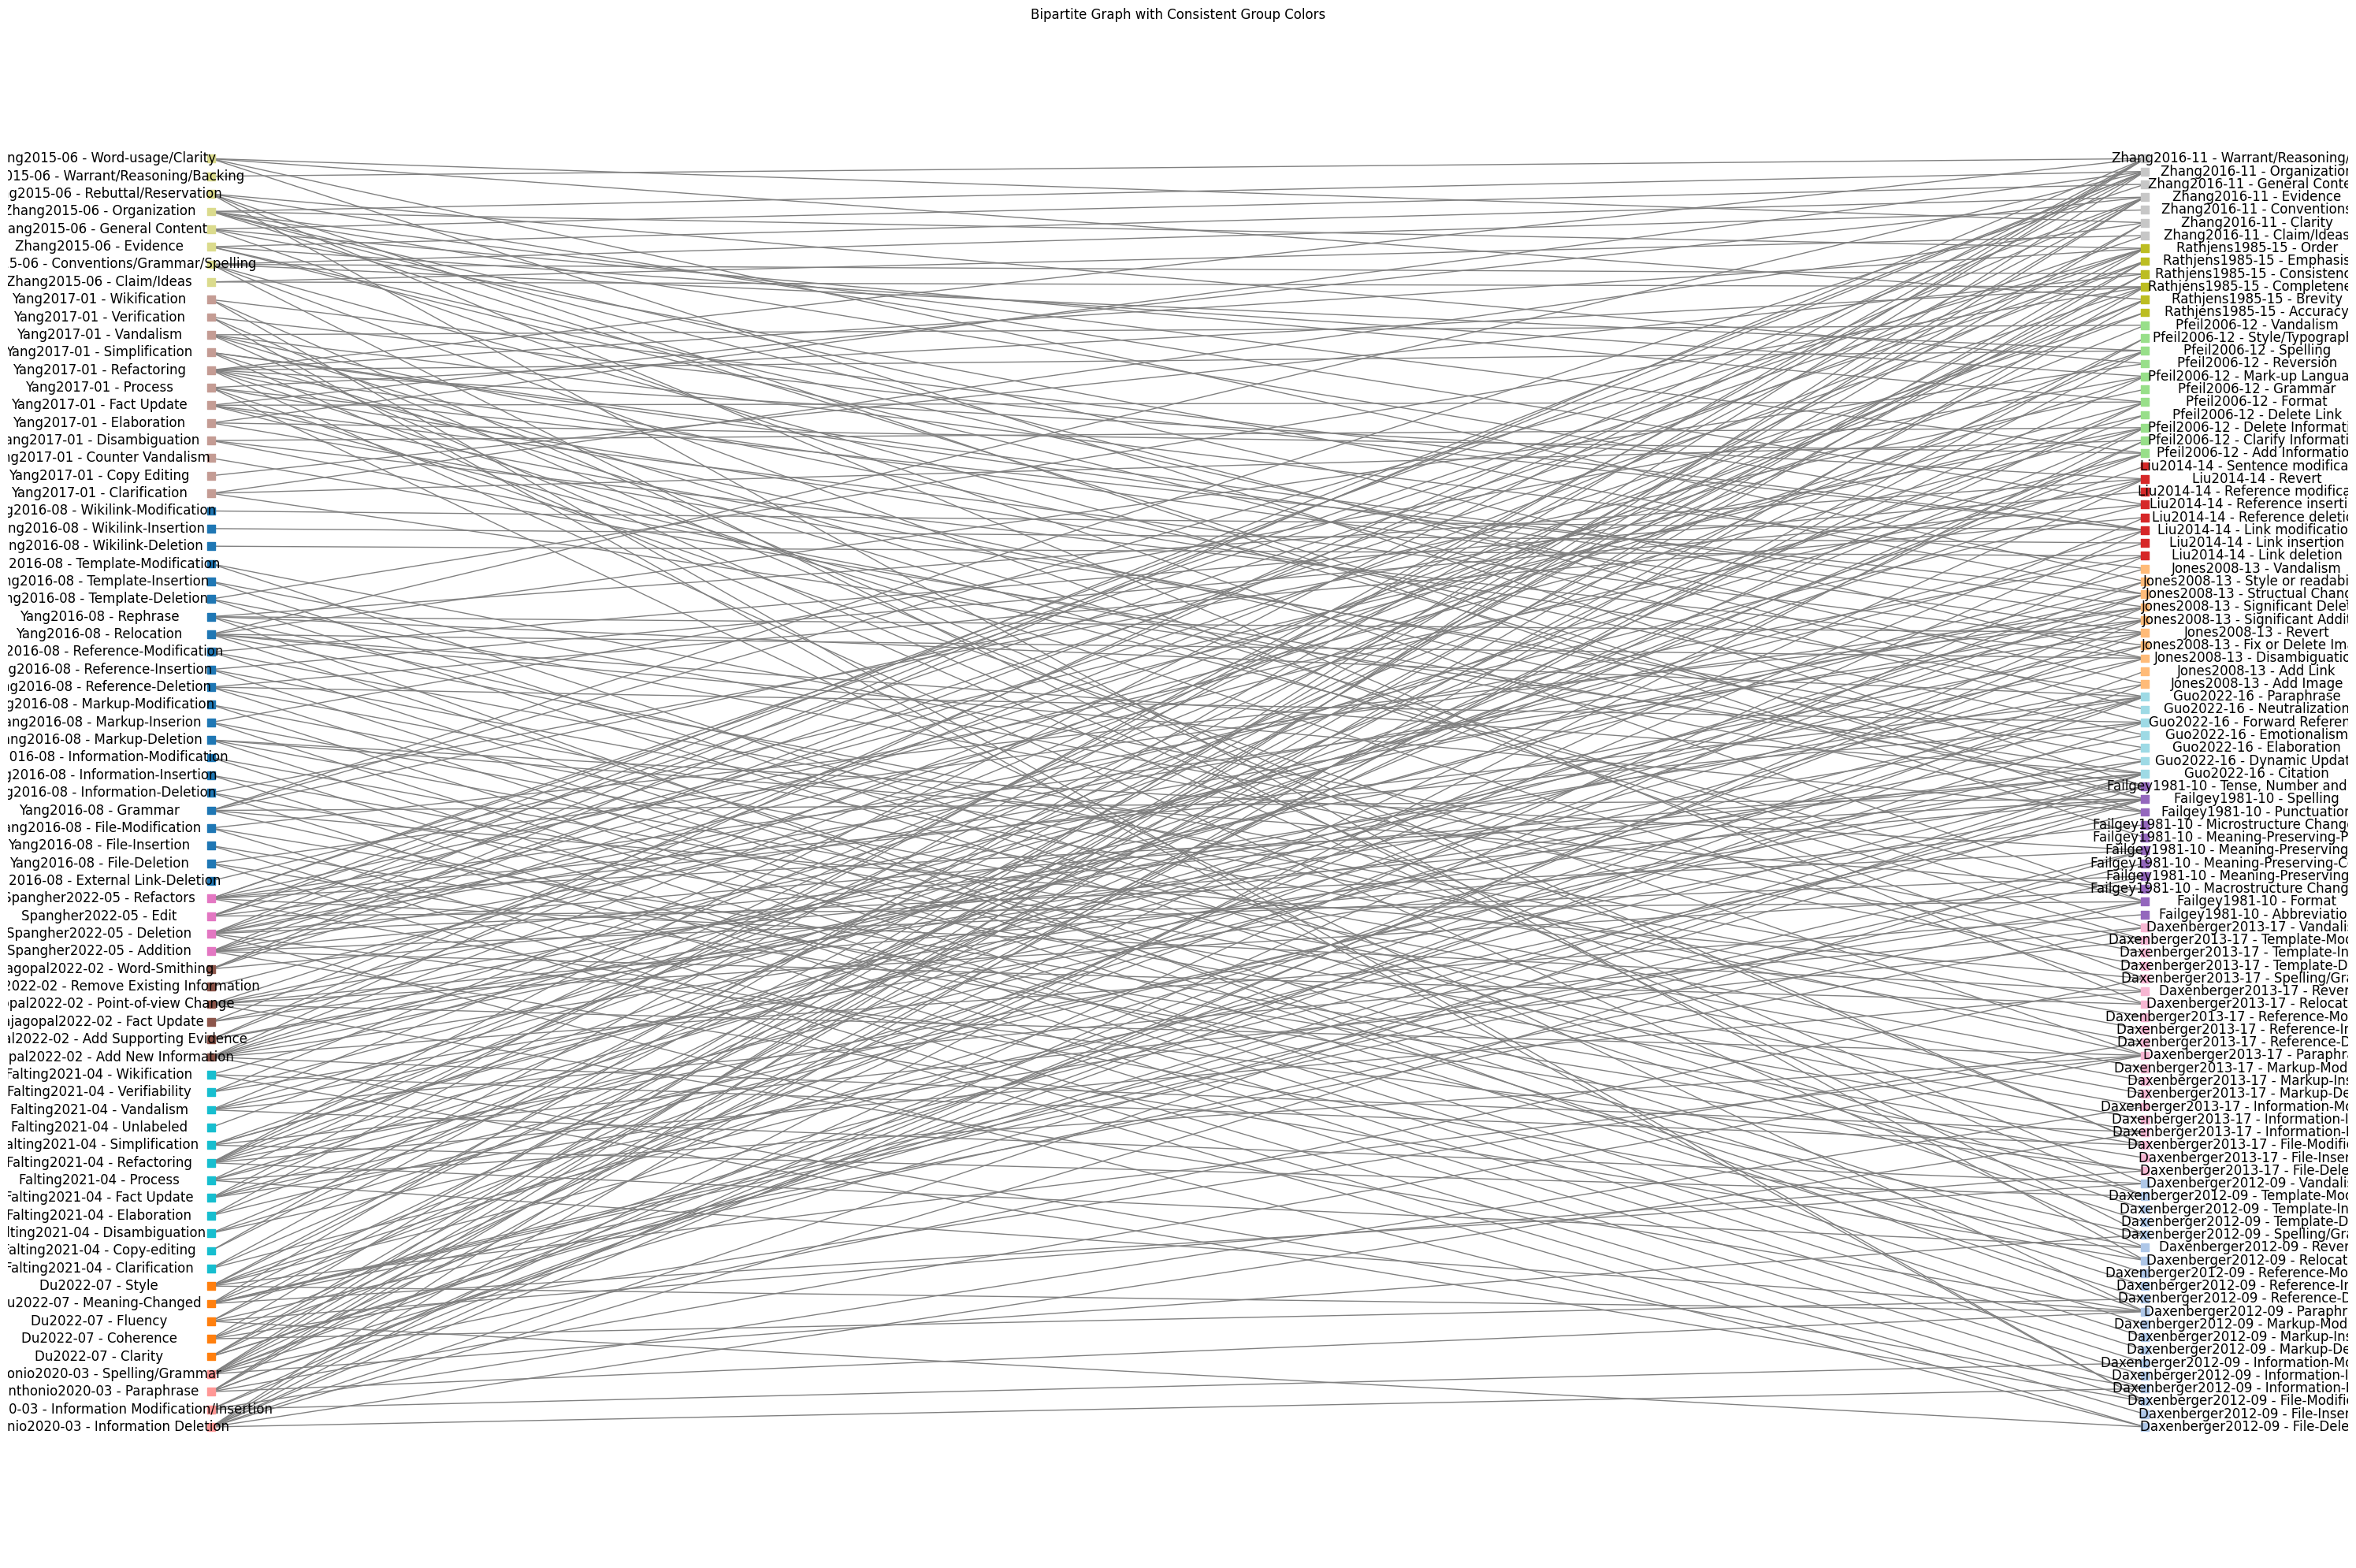

In [93]:
def draw_one_bipartite(left_nodes, right_nodes, connections):
    # Create a new bipartite graph
    B_concat = nx.Graph()

    # Add nodes for both sets
    B_concat.add_nodes_from(left_nodes, bipartite=0)
    B_concat.add_nodes_from(right_nodes, bipartite=1)

    # Add edges
    # for index, row in data.iterrows():
    #     B_concat.add_edge(row['node1'], row['node2'], weight=row['sim_score'])
    for node in left_nodes:
        for (node2, sim_score) in connections[node]:
            B_concat.add_edge(node, node2, weight=sim_score)


    # Separate node sets
    # left_nodes_concat = {n for n, d in B_concat.nodes(data=True) if d['bipartite']==0}
    # right_nodes_concat = set(B_concat) - left_nodes_concat

    # Position nodes
    pos_concat = nx.bipartite_layout(B_concat, left_nodes)

    # Generate color mapping for each table
    table_color_map = {table: colors(i) for i, table in enumerate(unique_tables)}

    # Map each node to its corresponding color based on its table
    node_color_map = {node: table_color_map[node.split(' - ')[0]] for node in B_concat.nodes}

    # Use the color map to get a list of colors for each node in the graph
    node_colors_concat = [node_color_map[node] for node in B_concat.nodes]

    # Draw the graph with the specified node colors
    # plt.figure(figsize=(20, 40))
    fig, ax = plt.subplots(figsize=(30, 20))

    nx.draw(B_concat, pos_concat, with_labels=False, node_shape='s', node_size=50, node_color=node_colors_concat, edge_color='grey', font_color='black', alpha=1, font_size=5)

    label_offset = 0.1  # Adjust this value as needed to fit the labels within the figure
    # Calculate label positions: right align for left nodes, left align for right nodes
    label_pos = {}
    for node, (x, y) in pos_concat.items():
        if node in left_nodes:
            label_pos[node] = (x - 0.1, y)  # Adjust offset for right alignment
        else:
            label_pos[node] = (x + 0.1, y)  # Adjust offset for left alignment


    # Draw the labels separately with adjusted positions
    nx.draw_networkx_labels(B_concat, label_pos)

    plt.title('Bipartite Graph with Consistent Group Colors')
    plt.axis('off')

    # Adjust margins of the plot
    plt.tight_layout()
    plt.show()

draw_one_bipartite(left_nodes, right_nodes, connections)
# # Draw the graph
# plt.figure(figsize=(15, 12))
# nx.draw(B_concat, pos_concat, with_labels=True, node_color=['skyblue' if n in left_nodes_concat else 'lightgreen' for n in B_concat], font_size=9)
# plt.title('Bipartite Graph with Concatenated Node Labels')
# plt.show()

table1 Anthonio2020-03
table2 Daxenberger2012-09
['Anthonio2020-03 - Information Deletion', 'Anthonio2020-03 - Information Modification/Insertion', 'Anthonio2020-03 - Paraphrase', 'Anthonio2020-03 - Spelling/Grammar']
4
['Daxenberger2012-09 - File-Deletion', 'Daxenberger2012-09 - File-Insertion', 'Daxenberger2012-09 - File-Modification', 'Daxenberger2012-09 - Information-Deletion', 'Daxenberger2012-09 - Information-Insertion', 'Daxenberger2012-09 - Information-Modification', 'Daxenberger2012-09 - Markup-Deletion', 'Daxenberger2012-09 - Markup-Inserion', 'Daxenberger2012-09 - Markup-Modification', 'Daxenberger2012-09 - Paraphrase', 'Daxenberger2012-09 - Reference-Deletion', 'Daxenberger2012-09 - Reference-Insertion', 'Daxenberger2012-09 - Reference-Modification', 'Daxenberger2012-09 - Relocation', 'Daxenberger2012-09 - Revert', 'Daxenberger2012-09 - Spelling/Grammar', 'Daxenberger2012-09 - Template-Deletion', 'Daxenberger2012-09 - Template-Insertion', 'Daxenberger2012-09 - Template-Modi

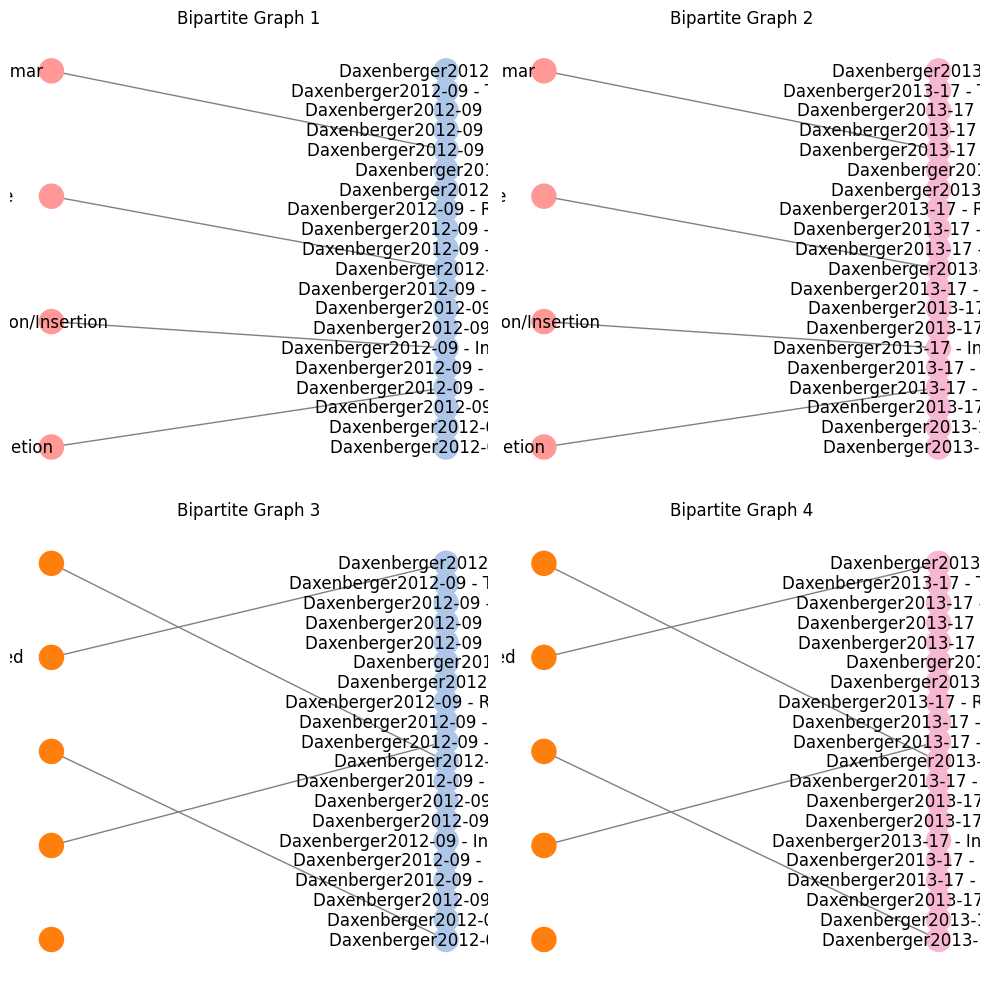

In [59]:
# Suppose we have three sets of data, each representing different node groups and connections
data_sets = [
    {'nodes1': ['a1', 'a2', 'a3'], 'nodes2': ['b1', 'b2'], 'edges': [('a1', 'b1'), ('a2', 'b2')]},
    {'nodes1': ['c1', 'c2'], 'nodes2': ['d1', 'd2', 'd3'], 'edges': [('c1', 'd1'), ('c2', 'd2')]},
    {'nodes1': ['e1', 'e2', 'e3'], 'nodes2': ['f1', 'f2'], 'edges': [('e1', 'f1'), ('e2', 'f2'), ('e3', 'f1')]}
]

# Define the number of rows and columns for the subplot grid
rows = 2#len(left_tables)  # Adjust based on your number of graphs
cols = 2#len(right_tables)  # Adjust based on your number of graphs

plt.figure(figsize=(cols * 5, rows * 5))  # Size of the entire figure
i = 0
# for i, data in enumerate(data_sets):
for table1 in left_tables[:2]:
    for table2 in right_tables[:2]:
        print("table1", table1)
        print("table2", table2)

        B = nx.Graph()

        # Add nodes with the bipartite attribute
        left_nodes_sub = [node for node in left_nodes if node.startswith(table1)]
        right_nodes_sub = [node for node in right_nodes if node.startswith(table2)]
        print(left_nodes_sub)
        print(len(left_nodes_sub))
        print(right_nodes_sub)
        print(len(right_nodes_sub))
        B.add_nodes_from(left_nodes_sub, bipartite=0)
        B.add_nodes_from(right_nodes_sub, bipartite=1)

        # Add edges
        # B.add_edges_from(data['edges'])
        for node in left_nodes_sub:
            for (node2, sim_score) in connections[node]:
                if not node2.startswith(table2):
                    continue
                B.add_edge(node, node2, weight=sim_score)

        # Generate color mapping for each table
        table_color_map = {table: colors(i) for i, table in enumerate(unique_tables)}

        # Map each node to its corresponding color based on its table
        node_color_map = {node: table_color_map[node.split(' - ')[0]] for node in B.nodes}

        # Use the color map to get a list of colors for each node in the graph
        node_colors_concat = [node_color_map[node] for node in B.nodes]

        # Calculate the layout for the bipartite graph
        pos = nx.bipartite_layout(B, left_nodes_sub)

        # Create a subplot for this graph

        plt.subplot(rows, cols, i + 1)
        # nx.draw(B, pos, with_labels=True)
        nx.draw(B, pos, with_labels=False, node_color=node_colors_concat, edge_color='grey', font_color='black', alpha=1, font_size=8)

        # Custom label positioning: left for nodes1, right for nodes2
        label_pos = {node: (x - 0.5, y) if node in left_nodes_sub else (x + 0.1, y) for node, (x, y) in pos.items()}

        # Draw the labels separately with adjusted positions
        nx.draw_networkx_labels(B, label_pos)

        plt.title(f'Bipartite Graph {i+1}')
        i += 1

plt.tight_layout()  # Adjust the spacing between plots
plt.show()
